In [16]:
# pip install ipynb

In [17]:
# pip install iisignature

In [4]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
import itertools
import math
import numbers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

from iisignature import *
from scipy.spatial import distance
plt.style.use("default")

### Sliding window

In [7]:
# ZEC_trade = read_OB('ZEC',month)
# ZEC_trade.head()

,table_id,unix,date,side,price,amount,local_value,pair,exchange
0,46229512,1577837165,2020-01-01 12:06:05 AM,ask,27.40,91.035000,2494.36,ZECUSD,gemini
1,46229513,1577837165,2020-01-01 12:06:05 AM,ask,27.41,57.195949,1567.74,ZECUSD,gemini
2,46229514,1577837165,2020-01-01 12:06:05 AM,ask,27.42,15.260000,418.43,ZECUSD,gemini
3,46229515,1577837165,2020-01-01 12:06:05 AM,ask,27.43,349.782426,9594.53,ZECUSD,gemini
4,46229516,1577837165,2020-01-01 12:06:05 AM,ask,27.44,16.185000,444.12,ZECUSD,gemini


In [8]:
# def creat_ob(OB_raw):
#     OB_rawgroup = OB_raw.groupby(['date','side']).agg({'price':['first','last'], 'amount':['first','last']})
    
#     OB_raw_date = OB_raw.date.unique()
#     # OB_raw_date = pd.to_datetime(BTC_OB_raw.loc[:,'date'].unique()).date
#     OB_raw_askprice = np.array(OB_rawgroup[('price', 'first')][0::2].reset_index(drop = True))
#     OB_raw_askorder = np.array(OB_rawgroup[('amount', 'first')][0::2].reset_index(drop = True))
#     OB_raw_bidprice = np.array(OB_rawgroup[('price', 'last')][1::2].reset_index(drop = True))
#     OB_raw_bidorder = np.array(OB_rawgroup[('amount', 'last')][1::2].reset_index(drop = True))
#     OB = pd.DataFrame({'datetime' : OB_raw_date,'best_ask_price' : OB_raw_askprice,'ask_order' : OB_raw_askorder, 'best_bid_price' : OB_raw_bidprice, 'bid_order' : OB_raw_bidorder})
#     OB['datetime'] = pd.to_datetime(OB['datetime'])    # loop through hours

#     return OB

In [54]:
# def separ_ob_bydate_dropdate(df_order_book):
#     # date_column_index = df_order_book.groupby(by=df_order_book['datetime'].dt.date).agg({'datetime' : 'count'}).datetime.tolist()
#     date_column_index = count_consec(df_order_book['datetime'].dt.date.tolist())
#     date_label = df_order_book.datetime.dt.date.unique()
#     scaler = MinMaxScaler()
#     #df_order_book['datetime'] = scaler.fit_transform(df_order_book['datetime'].values.reshape(-1, 1))
#     df_order_book.drop(columns =['datetime'],inplace=True)
#     ob_total = []
#     line_count = 0
#     for i in range(len(date_column_index)):
#         ob_eachdate = []
#         for line in range(date_column_index[i]):
#             ob_eachdate.append(df_order_book.iloc[line_count,:].to_numpy())
#             line_count = line_count + 1
#         ob_total.append(np.array(ob_eachdate))
#     ob_total = np.array(ob_total)
#     return ob_total,date_label

# def count_consec(lis):
#     count=1
#     consec_list=[]
#     for i in range(len(lis[:-1])):
#         if lis[i] == lis[i+1]:
#             count+=1
#         else:
#             consec_list.append(count)
#             count=1  
        
#     consec_list.append(count)   
        
#     return consec_list

In [55]:
# OB_trans = create_trans_ob(creat_ob(ZEC_trade))
# OB_log_mid_price = OB_trans['log_mid_price']
# OB_spread = OB_trans['spread']
# OB_trans_value,OB_trans_label = separ_ob_bydate_dropdate(OB_trans)

C:\Users\Millie\AppData\Local\Temp/ipykernel_22972/100308037.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ob_total = np.array(ob_total)


In [60]:
# OB_day_train_ll = transform(OB_trans_value[:60],False,True) 

C:\Users\Millie\AppData\Local\Temp/ipykernel_22972/767709120.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(paths)


In [ ]:
# def OB_conformance_anomaly_detect_sliding_window(OB_trans,epslion):
    
#     OB_value_train,OB_label_train = separ_ob_bydate_dropdate(OB_train)
#     OB_value_test,OB_label_test = separ_ob_bydate_dropdate(OB_test)
    
#     OB_day_list_train_ll = transform(np.array(OB_value_train),False,True)
#     OB_day_list_test_ll = transform(np.array(OB_value_test),False,True)
    
#     anoml_date_list_train = []
#     anoml_date_list_test = []
    
#     date_X1,date_X2,date_y1,date_y2,date_Xtest,data_Xtrain= sign_splitdata_all(OB_day_list_train_ll,OB_label_train,OB_day_list_test_ll,3)
#     date_threshold,date_predlabel_train1,date_predlabel_train2= thershold_all(date_X1,date_X2,epslion)
    
#     date_preddist_test,date_predlabel_test = pred_anomaly(date_Xtest,data_Xtrain,date_threshold)
    
#     for i in range(len(date_predlabel_train1)):
#         if date_predlabel_train1[i] == 1:
#             anoml_date_list_train.append(date_y1[i])
#     for i in range(len(date_predlabel_train2)):
#         if date_predlabel_train2[i] == 1:
#             anoml_date_list_train.append(date_y2[i])
            
#     for i in range(len(date_predlabel_test)):
#         if date_predlabel_test[i] == 1:
#             anoml_date_list_test.append(OB_label_test[i])
    
#     return anoml_date_list_train,anoml_date_list_test

In [ ]:
# def implement_traintest(OB_name,OB_raw_train,OB_raw_test,epsilon):
#     OB_train = creat_ob(OB_raw_train)
#     OB_test = creat_ob(OB_raw_test)
    
#     OB_datetime_train = OB_train['datetime']
#     OB_datetime_test = OB_test['datetime']
    
#     OB_trans_train = create_trans_ob(OB_train)
#     OB_trans_train = OB_trans_train.drop(columns=['best_ask_price', 'best_bid_price','ask_order','bid_order'])
    
#     OB_trans_test = create_trans_ob(OB_test)
#     OB_trans_test = OB_trans_test.drop(columns=['best_ask_price', 'best_bid_price','ask_order','bid_order'])

#     OB_log_mid_price_train = OB_trans_train['log_mid_price']
#     OB_spread_train = OB_trans_train['spread']
#     OB_log_mid_price_test = OB_trans_test['log_mid_price']
#     OB_spread_test = OB_trans_test['spread']
    
    
#     result_train,result_test = OB_conformance_anomaly_detect_traintest(OB_trans_train,OB_trans_test,epsilon)
    
#     fig, ax = plt.subplots(figsize=(12,5))
    
#     ax.plot(OB_datetime_train,OB_log_mid_price_train,label='log_mid_price_train')
#     ax.plot(OB_datetime_test,OB_log_mid_price_test,label='log_mid_price_test')
#     for i in result_train:
#         ax.axvline(i,color = 'hotpink',label='anomaly date',linewidth = 3,alpha =0.7)
#     for i in result_test:
#         ax.axvline(i,color = 'hotpink',label='anomaly date',linewidth = 3,alpha =0.7)
    
#     legend_without_duplicate_labels(ax)
#     ax.set_ylabel('USD')
    
#     fig.savefig('figure/orderbook/market_{}_mid_price_traintest.png'.format(OB_name), dpi=300)
    
#     fig, ax = plt.subplots(figsize=(12,5))
    
#     ax.plot(OB_datetime_train,OB_spread_train,label='spread_train')
#     ax.plot(OB_datetime_test,OB_spread_test,label='spread_test')
#     for i in result_train:
#         ax.axvline(i,color = 'hotpink',label='anomaly date',linewidth = 3,alpha =0.8)
#     for i in result_test:
#         ax.axvline(i,color = 'hotpink',label='anomaly date',linewidth = 3,alpha =0.8)
    
#     legend_without_duplicate_labels(ax)
#     ax.set_ylabel('USD')
    
#     fig.savefig('figure/orderbook/market_{}_spread_traintest.png'.format(OB_name), dpi=300)
    
#     return result_train,result_test

In [2]:
# month_train = ['JAN','FEB','MAR',"APR","MAY","JUN","JUL","AUG"]

# def read_OB(coin,ttype):
#     OB_all = pd.read_csv("../data/{}/{}USD_Gemini_OB_data_{}2020.csv".format(coin,coin,ttype[0]))
#     for m in ttype[1:]:
#         OB_month  = pd.read_csv("../data/{}/{}USD_Gemini_OB_data_{}2020.csv".format(coin,coin,m))
#         frames = [OB_all, OB_month]
#         OB_all = pd.concat(frames)
#     return OB_all

### Old read data

In [67]:
ZEC_OB_train = read_OB('ZEC',month_train)
# ZEC_OB_test = read_OB('ZEC',month_test)

In [23]:
BTC_OB_train = read_OB('BTC',month_train)
BTC_OB_test = read_OB('BTC',month_test)

In [24]:
BTC_OB_test.tail()

,table_id,unix,date,side,price,amount,local_value,pair,exchange
752395,76457793,1598918113,8/31/2020 23:55,bid,11664.11,0.986200,11503.15,BTCUSD,gemini
752396,76457792,1598918113,8/31/2020 23:55,bid,11666.84,0.200000,2333.37,BTCUSD,gemini
752397,76457791,1598918113,8/31/2020 23:55,bid,11667.40,0.890000,10383.99,BTCUSD,gemini
752398,76457790,1598918113,8/31/2020 23:55,bid,11668.44,2.000000,23336.88,BTCUSD,gemini
752399,76457789,1598918113,8/31/2020 23:55,bid,11668.45,0.275572,3215.50,BTCUSD,gemini


In [25]:
# ETH_OB_train = read_OB('ETH',month_train)
# ETH_OB_test = read_OB('ETH',month_test)

In [26]:
# ETH_OB_train.head()

In [27]:
LTC_OB_train = read_OB('LTC',month_train)
LTC_OB_test = read_OB('LTC',month_test)

In [28]:
LTC_OB_train.head()

,table_id,unix,date,side,price,amount,local_value,pair,exchange
0,46229149,1577837165,2020-01-01 12:06:05 AM,ask,41.13,21.022,864.63,LTCUSD,gemini
1,46229150,1577837165,2020-01-01 12:06:05 AM,ask,41.14,121.590,5002.21,LTCUSD,gemini
2,46229151,1577837165,2020-01-01 12:06:05 AM,ask,41.15,13.110,539.48,LTCUSD,gemini
3,46229152,1577837165,2020-01-01 12:06:05 AM,ask,41.16,43.032,1771.20,LTCUSD,gemini
4,46229153,1577837165,2020-01-01 12:06:05 AM,ask,41.18,52.541,2163.64,LTCUSD,gemini


### Conformance anomlay detection equations

In [18]:
# Conformance anomaly detection method with signature transform
def sign_splitdata_train(x,y,order):
    signa = [list(sig(stream, order)) for stream in x]
    
    scaler = MinMaxScaler()
    X_center = np.array(scaler.fit_transform(signa))
    X1,X2,y1,y2 = train_test_split(X_center,y,test_size=0.5,random_state=10)
    
    return X1,X2,y1,y2

def conformance(x, X2):
    cov_X2 = np.linalg.pinv(np.cov((x-X2).T))
    inf = distance.mahalanobis(x, X2[0], cov_X2)
    for i in range(len(X2)):
        mal = distance.mahalanobis(x, X2[i], cov_X2)
        if inf > mal:
            inf = mal
    return inf

def thershold_all(X1,X2,epsilon):
    threshold_1,pred_label_1 = thershold(X1,X2,epsilon)
    threshold_2,pred_label_2 = thershold(X2,X1,epsilon)
    return (threshold_1+threshold_2)/2,pred_label_1,pred_label_2

def thershold(X1,X2,epsilon):
    dist = []
    pred_label = []
    for i in range(len(X1)):
        dist.append(conformance(X1[i],X2))
    dist = np.array(dist)
    threshold = np.quantile(dist,epsilon)
    
    for i in range(len(X1)):
        if dist[i] > threshold:
            dist = np.array(dist)
            pred_label.append(1)
        else:
            pred_label.append(0)
    return threshold,pred_label

def pred_anomaly(X_test,X2,thresh):
    predlabel = []
    conf = []
    for i in range(len(X_test)):
        conf.append(conformance(X_test[i],X2))
        if conf[i] > thresh:
            predlabel.append(1)
        else:
            predlabel.append(0)
    return conf,predlabel

# cited from https://github.com/crispitagorico/sigkernel/blob/master/sigkernel/transformers.py
import copy
import math
from scipy.ndimage import shift
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import as_float_array
def transform(paths, at=False, ll=False, scale=1.):
    #paths = scale*paths
    if ll:
        paths = LeadLag().fit_transform(paths)
    if at:
        paths = AddTime().fit_transform(paths)
    return np.array(paths)

def normalize(sigs, width, depth):
    new_sigs = []
    for sig in sigs:
        new_sig = np.zeros_like(sig)
        for k in range(depth):
            dim = width*(width**(k)-1)
            new_sig[dim:dim + width**(k+1)] = math.factorial(k+1)*sig[dim:dim + width**(k+1)]
        new_sigs.append(new_sig)
    return np.array(new_sigs)

class AddTime(BaseEstimator, TransformerMixin):
    def __init__(self, init_time=0., total_time=1.):
        self.init_time = init_time
        self.total_time = total_time

    def fit(self, X, y=None):
        return self

    def transform_instance(self, X):
        t = np.linspace(self.init_time, self.init_time + 1, len(X))
        return np.c_[t, X]

    def transform(self, X, y=None):
        return [self.transform_instance(x) for x in X]

class Reversion(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return [as_float_array(x[::-1]) for x in X]


class LeadLag(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform_instance(self, X):
        lag = []
        lead = []

        for val_lag, val_lead in zip(X[:-1], X[1:]):
            lag.append(val_lag)
            lead.append(val_lag)

            lag.append(val_lag)
            lead.append(val_lead)

        lag.append(X[-1])
        lead.append(X[-1])

        return np.c_[lag, lead]

    def transform(self, X, y=None):
        return [self.transform_instance(x) for x in X]

### Initial read OB

In [6]:
# month_train = ['JAN','FEB','MAR',"APR","MAY"]
# month_test = ["JUN","JUL","AUG"]
month = ['JAN','FEB','MAR',"APR"]
def read_OB(coin,ttype):
    OB_all = pd.read_csv("../data/{}/{}USD_Gemini_OB_data_{}2020.csv".format(coin,coin,ttype[0]))
    for m in ttype[1:]:
        OB_month  = pd.read_csv("../data/{}/{}USD_Gemini_OB_data_{}2020.csv".format(coin,coin,m))
        frames = [OB_all, OB_month]
        OB_all = pd.concat(frames)
    return OB_all

### normlized and label by hour

In [7]:
def creat_ob(OB_raw):
    OB_rawgroup = OB_raw.groupby(['date','side']).agg({'price':['first','last'], 'amount':['first','last']})
    
    OB_raw_date = OB_raw.date.unique()
    # OB_raw_date = pd.to_datetime(BTC_OB_raw.loc[:,'date'].unique()).date
    OB_raw_askprice = np.array(OB_rawgroup[('price', 'first')][0::2].reset_index(drop = True))
    OB_raw_askorder = np.array(OB_rawgroup[('amount', 'first')][0::2].reset_index(drop = True))
    OB_raw_bidprice = np.array(OB_rawgroup[('price', 'last')][1::2].reset_index(drop = True))
    OB_raw_bidorder = np.array(OB_rawgroup[('amount', 'last')][1::2].reset_index(drop = True))
    OB = pd.DataFrame({'datetime' : OB_raw_date,'best_ask_price' : OB_raw_askprice,'ask_order' : OB_raw_askorder, 'best_bid_price' : OB_raw_bidprice, 'bid_order' : OB_raw_bidorder})
    OB['datetime'] = pd.to_datetime(OB['datetime'])    # loop through hours

    return OB

In [8]:
def create_trans_ob(OB):
    OB['log_mid_price'] = np.log((OB['best_ask_price']+OB['best_bid_price'])/2)
    OB['spread'] = OB['best_ask_price']-OB['best_bid_price']
    OB['imbalance'] = (OB['ask_order'] - OB['bid_order'])
    #OB['imbalance'] = (OB['ask_order'] - OB['bid_order'])/(OB['ask_order'] + OB['bid_order'])
    return OB

In [9]:
def count_consec(lis):
    count=1
    consec_list=[]
    for i in range(len(lis[:-1])):
        if lis[i] == lis[i+1]:
            count+=1
        else:
            consec_list.append(count)
            count=1  
        
    consec_list.append(count)   
        
    return consec_list

In [32]:
# def separ_ob_byhours(ob):
#     sep_byhour_row_num = count_consec(ob['datetime'].dt.hour.tolist())
#     hour_label = ob.datetime.dt.hour
#     hour_label = [g for g, _ in itertools.groupby(hour_label)]
# #     scaler = MinMaxScaler()
# #     BTC_OB['datetime'] = scaler.fit_transform(BTC_OB['datetime'].values.reshape(-1, 1))
#     ob_total = []
#     ob_label = []
#     line_count = 0 
#     for i in range(len(sep_byhour_row_num)):
#         ob_eachhour = []
#         for line in range(sep_byhour_row_num[i]):
#             ob_eachhour.append(ob.iloc[line_count,:].tolist())
            
#             line_count = line_count + 1
            
#         if len(ob_eachhour) >= 5:
#             ob_total.append(ob_eachhour)
#             ob_label.append(hour_label[i])
#     return ob_total,ob_label

In [33]:
# def separ_ob_bydate(df_order_book):
#     # date_column_index = df_order_book.groupby(by=df_order_book['datetime'].dt.date).agg({'datetime' : 'count'}).datetime.tolist()
#     date_column_index = count_consec(df_order_book['datetime'].dt.date.tolist())
#     date_label = df_order_book.datetime.dt.date.unique()
#     scaler = MinMaxScaler()
#     df_order_book['datetime'] = scaler.fit_transform(df_order_book['datetime'].values.reshape(-1, 1))
#     ob_total = []
#     line_count = 0
#     for i in range(len(date_column_index)):
#         ob_eachdate = []
#         for line in range(date_column_index[i]):
#             ob_eachdate.append(df_order_book.iloc[line_count,:].to_numpy())
#             line_count = line_count + 1
    
#         ob_total.append(np.array(ob_eachdate))
#     ob_total = np.array(ob_total)
#     return ob_total,date_label

In [11]:
def separ_ob_bydate_dropdate(df_order_book):
    # date_column_index = df_order_book.groupby(by=df_order_book['datetime'].dt.date).agg({'datetime' : 'count'}).datetime.tolist()
    date_column_index = count_consec(df_order_book['datetime'].dt.date.tolist())
    date_label = df_order_book.datetime.dt.date.unique()
    scaler = MinMaxScaler()
    #df_order_book['datetime'] = scaler.fit_transform(df_order_book['datetime'].values.reshape(-1, 1))
    df_order_book.drop(columns =['datetime'],inplace=True)
    ob_total = []
    line_count = 0
    for i in range(len(date_column_index)):
        ob_eachdate = []
        for line in range(date_column_index[i]):
            ob_eachdate.append(df_order_book.iloc[line_count,:].to_numpy())
            line_count = line_count + 1
    
        ob_total.append(np.array(ob_eachdate))
    ob_total = np.array(ob_total)
    return ob_total,date_label

In [35]:
# def OB_conformance_anomaly_detect(OB_trans,epslion):
#     BTC_OB_day_list,BTC_OB_day_label = separ_ob_bydate(OB_trans)
#     BTC_OB_day_list_ll = transform(np.array(BTC_OB_day_list),False,True)
    
#     date_X1,date_X2,date_y1,date_y2= sign_splitdata_train(BTC_OB_day_list_ll,BTC_OB_day_label,3)
#     date_threshold,date_predlabel = thershold(date_X1,date_X2,epslion)
#     anoml_date_list = []
#     for i in range(len(date_predlabel)):
#         if date_predlabel[i] == 1:
#             anoml_date_list.append(date_y1[i])
#     anoml_date_list.sort()
#     return anoml_date_list,date_threshold

In [36]:
# def sign_splitdata(x,y,x_test,order):
#     signa = [list(sig(np.array(stream), order)) for stream in x]
#     signa_test = [list(sig(np.array(stream), order)) for stream in x_test]
    
#     scaler = MinMaxScaler()
#     X_center = np.array(scaler.fit_transform(signa))
#     X_testcenter = np.array(scaler.transform(signa_test))
#     # math.factorial(order)*
#     X1,X2,y1,y2 = train_test_split(X_center,y,test_size=0.5)
    
#     return X1,X2,y1,X_testcenter
# def thershold_all(X1,X2,epsilon):
#     threshold_1,pred_label_1 = thershold(X1,X2,epsilon)
#     threshold_2,pred_label_2 = thershold(X2,X1,epsilon)
#     return (threshold_1+threshold_2)/2,pred_label_1,pred_label_2
# def thershold(X1,X2,epsilon):
#     dist = []
#     pred_label = []
#     for i in range(len(X1)):
#         dist.append(conformance(X1[i],X2))
#     dist = np.array(dist)
#     threshold = np.quantile(dist,epsilon)
#     for i in range(len(X1)):
#         if dist[i] > threshold:
#             dist = np.array(dist)
#             pred_label.append(1)
#         else:
#             pred_label.append(0)
#     return threshold,pred_label
# def pred_anomaly(X_test,X2,thresh,X_test_label):
#     anoma = []
#     conf = []

#     for i in range(len(X_test)):
#         conf.append(conformance(X_test[i],X2))
#         if conf[i] > thresh:
#             anoma.append(1)
#         else:
#             anoma.append(0)
#     return conf,anoma

In [12]:
def OB_conformance_anomaly_detect_trainrepeat(OB_trans,epslion):
    BTC_OB_day_list,BTC_OB_day_label = separ_ob_bydate_dropdate(OB_trans)
    BTC_OB_day_list_ll = transform(np.array(BTC_OB_day_list),False,True)
    anoml_date_list = []
    
    date_X1,date_X2,date_y1,date_y2= sign_splitdata_train(BTC_OB_day_list_ll,BTC_OB_day_label,3)
    date_threshold,date_predlabel_1,date_predlabel_2 = thershold_all(date_X1,date_X2,epslion)
    
    for i in range(len(date_predlabel_1)):
        if date_predlabel_1[i] == 1:
            anoml_date_list.append(date_y1[i])
    for i in range(len(date_predlabel_2)):
        if date_predlabel_2[i] == 1:
            anoml_date_list.append(date_y2[i])
    
    return anoml_date_list,date_threshold

In [38]:
# def OB_conformance_anomaly_detect_original(OB_train,OB_test,epslion):
#     OB_value_train,OB_label_train = separ_ob_bydate(OB_train)
#     OB_value_test,OB_label_test = separ_ob_bydate(OB_test)
    
#     OB_day_list_train_ll = transform(np.array(OB_value_train),False,True)
#     OB_day_list_test_ll = transform(np.array(OB_value_test),False,True)
    
#     anoml_date_list_train = []
#     anoml_date_list_test = []
    
#     date_X1,date_X2,date_y1,date_y2,date_Xtest= sign_splitdata(OB_day_list_train_ll,OB_label_train,OB_day_list_test_ll,3)
#     date_threshold,date_predlabel_train= thershold(date_X1,date_X2,epslion)
    
#     date_preddist_test,date_predlabel_test = pred_anomaly(date_Xtest,date_X2,date_threshold)
    
#     for i in range(len(date_predlabel_train)):
#         if date_predlabel_train[i] == 1:
#             anoml_date_list_train.append(date_y1[i])
# #     for i in range(len(date_predlabel_train2)):
# #         if date_predlabel_train2[i] == 1:
# #             anoml_date_list_train.append(date_y2[i])
            
#     for i in range(len(date_predlabel_test)):
#         if date_predlabel_test[i] == 1:
#             anoml_date_list_test.append(OB_label_test[i])
    
#     return anoml_date_list_train,anoml_date_list_test

In [13]:
def OB_conformance_anomaly_detect_traintest(OB_train,OB_test,epslion):
    OB_value_train,OB_label_train = separ_ob_bydate_dropdate(OB_train)
    OB_value_test,OB_label_test = separ_ob_bydate_dropdate(OB_test)
    
    OB_day_list_train_ll = transform(np.array(OB_value_train),False,True)
    OB_day_list_test_ll = transform(np.array(OB_value_test),False,True)
    
    anoml_date_list_train = []
    anoml_date_list_test = []
    
    date_X1,date_X2,date_y1,date_y2,date_Xtest,data_Xtrain= sign_splitdata_all(OB_day_list_train_ll,OB_label_train,OB_day_list_test_ll,3)
    date_threshold,date_predlabel_train1,date_predlabel_train2= thershold_all(date_X1,date_X2,epslion)
    
    date_preddist_test,date_predlabel_test = pred_anomaly(date_Xtest,data_Xtrain,date_threshold)
    
    for i in range(len(date_predlabel_train1)):
        if date_predlabel_train1[i] == 1:
            anoml_date_list_train.append(date_y1[i])
    for i in range(len(date_predlabel_train2)):
        if date_predlabel_train2[i] == 1:
            anoml_date_list_train.append(date_y2[i])
            
    for i in range(len(date_predlabel_test)):
        if date_predlabel_test[i] == 1:
            anoml_date_list_test.append(OB_label_test[i])
    
    return anoml_date_list_train,anoml_date_list_test

In [40]:
# def plot_OB_anomaly_date(x,y,anomaly_date_list):
#     fig, ax = plt.subplots(figsize=(15,5))
#     ax.plot(x,y,label='log_mid_price')
#     for i in anoml_date_list:
#         ax.axvline(i,color = 'hotpink',label='anomaly date')
#     legend_without_duplicate_labels(ax)
#     ax.set_ylabel('USD')
#     plt.show()

In [14]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))

In [15]:
from sklearn.preprocessing import StandardScaler
def implement_onlytrain(OB_name,OB_raw,epsilon):
    OB = creat_ob(OB_raw)

    OB_datetime = OB['datetime']

    OB_trans = create_trans_ob(OB)
    OB_trans = OB_trans.drop(columns=['best_ask_price', 'best_bid_price','ask_order','bid_order'])
    
    OB_log_mid_price = OB_trans['log_mid_price']
    OB_spread = OB_trans['spread']
    
    
    anoml_date_train,threshold = OB_conformance_anomaly_detect_trainrepeat(OB_trans,epsilon)
    
    fig, ax = plt.subplots(figsize=(12,5))
    ax.plot(OB_datetime,OB_log_mid_price,label='log_mid_price_train',color = 'black')
    
    for i in anoml_date_train:
        ax.axvline(i,color = 'red',label='anomaly date',linewidth = 3,alpha =0.7)
    legend_without_duplicate_labels(ax)
    ax.set_ylabel('USD')
    fig.savefig('figure/orderbook/market_{}_mid_price_train.png'.format(OB_name), dpi=300)
    
    fig, ax = plt.subplots(figsize=(12,5))
    ax.plot(OB_datetime,OB_spread,label='spread_train',color = 'black')
    for i in anoml_date_train:
        ax.axvline(i,color = 'red',label='anomaly date',linewidth = 3,alpha =0.7)
    legend_without_duplicate_labels(ax)
    ax.set_ylabel('USD')
    fig.savefig('figure/orderbook/market_{}_spread_train.png'.format(OB_name), dpi=300)
    
    return anoml_date_train,threshold

In [16]:
def plot_CADSig_result(OB_name,OB_raw,epsilon):
    OB = creat_ob(OB_raw)

    OB_datetime = OB['datetime']

    OB_trans = create_trans_ob(OB)
    
    min_max_scaler = MinMaxScaler()
    OB_scaled = min_max_scaler.fit_transform(OB_trans[['log_mid_price','spread','ask_order','bid_order']])
    OB_log_mid_price = OB_scaled.T[0]
    OB_spread = OB_scaled.T[1]
    OB_ask_order = OB_scaled.T[2]
    OB_bid_order = OB_scaled.T[3]
    
    OB_trans = OB_trans.drop(columns=['best_ask_price', 'best_bid_price','ask_order','bid_order'])

#     min_max_scaler = MinMaxScaler()
#     OB_scaled = min_max_scaler.fit_transform(OB_trans[['log_mid_price','spread']])
#     OB_log_mid_price = OB_scaled.T[0]
#     OB_spread = OB_scaled.T[1]

    
    anoml_date_train,threshold = OB_conformance_anomaly_detect_trainrepeat(OB_trans,epsilon)
    
    fig, ax = plt.subplots(figsize=(8,5))
    ax.plot(OB_datetime,OB_log_mid_price,label='Log_mid_price',color=sns.color_palette('Set2')[2],alpha =0.7)
    ax.plot(OB_datetime,OB_spread,label='Spread',color=sns.color_palette('Set2')[3],alpha =0.7)
    ax.plot(OB_datetime,OB_ask_order,label='Ask_order',color=sns.color_palette('Set2')[4],alpha =0.7)
    ax.plot(OB_datetime,OB_bid_order,label='Bid_order',color =sns.color_palette('Set2')[6],alpha =0.7)
    
    for i in anoml_date_train:
        ax.axvline(i,color = 'red',label='anomaly date',linewidth = 3,alpha =0.3)
    legend_without_duplicate_labels(ax)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.set_ylabel('Standardize Value')
    fig.savefig('figure/orderbook/market_{}_mid_price_train.png'.format(OB_name), dpi=300)
    
#     fig, ax = plt.subplots(figsize=(12,5))
#     ax.plot(OB_datetime,OB_spread,label='spread_train',color = 'black')
#     for i in anoml_date_train:
#         ax.axvline(i,color = 'red',label='anomaly date',linewidth = 3,alpha =0.7)
#     legend_without_duplicate_labels(ax)
#     ax.set_ylabel('USD')
#     fig.savefig('figure/orderbook/market_{}_spread_train.png'.format(OB_name), dpi=300)
    
    return anoml_date_train,threshold

In [126]:
def implement_traintest(OB_name,OB_raw_train,OB_raw_test,epsilon):
    OB_train = creat_ob(OB_raw_train)
    OB_test = creat_ob(OB_raw_test)
    
    OB_datetime_train = OB_train['datetime']
    OB_datetime_test = OB_test['datetime']
    
    OB_trans_train = create_trans_ob(OB_train)
    OB_trans_train = OB_trans_train.drop(columns=['best_ask_price', 'best_bid_price','ask_order','bid_order'])
    
    OB_trans_test = create_trans_ob(OB_test)
    OB_trans_test = OB_trans_test.drop(columns=['best_ask_price', 'best_bid_price','ask_order','bid_order'])

    OB_log_mid_price_train = OB_trans_train['log_mid_price']
    OB_spread_train = OB_trans_train['spread']
    OB_log_mid_price_test = OB_trans_test['log_mid_price']
    OB_spread_test = OB_trans_test['spread']
    
    
    result_train,result_test = OB_conformance_anomaly_detect_traintest(OB_trans_train,OB_trans_test,epsilon)
    
    fig, ax = plt.subplots(figsize=(12,5))
    
    ax.plot(OB_datetime_train,OB_log_mid_price_train,label='log_mid_price_train')
    ax.plot(OB_datetime_test,OB_log_mid_price_test,label='log_mid_price_test')
    for i in result_train:
        ax.axvline(i,color = 'hotpink',label='anomaly date',linewidth = 3,alpha =0.7)
    for i in result_test:
        ax.axvline(i,color = 'hotpink',label='anomaly date',linewidth = 3,alpha =0.7)
    
    legend_without_duplicate_labels(ax)
    ax.set_ylabel('USD')
    
    fig.savefig('figure/orderbook/market_{}_mid_price_traintest.png'.format(OB_name), dpi=300)
    
    fig, ax = plt.subplots(figsize=(12,5))
    
    ax.plot(OB_datetime_train,OB_spread_train,label='spread_train')
    ax.plot(OB_datetime_test,OB_spread_test,label='spread_test')
    for i in result_train:
        ax.axvline(i,color = 'hotpink',label='anomaly date',linewidth = 3,alpha =0.8)
    for i in result_test:
        ax.axvline(i,color = 'hotpink',label='anomaly date',linewidth = 3,alpha =0.8)
    
    legend_without_duplicate_labels(ax)
    ax.set_ylabel('USD')
    
    fig.savefig('figure/orderbook/market_{}_spread_traintest.png'.format(OB_name), dpi=300)
    
    return result_train,result_test

#### ZEC

C:\Users\Millie\AppData\Local\Temp/ipykernel_22972/1177084670.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ob_total = np.array(ob_total)
C:\Users\Millie\AppData\Local\Temp/ipykernel_22972/767709120.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(paths)


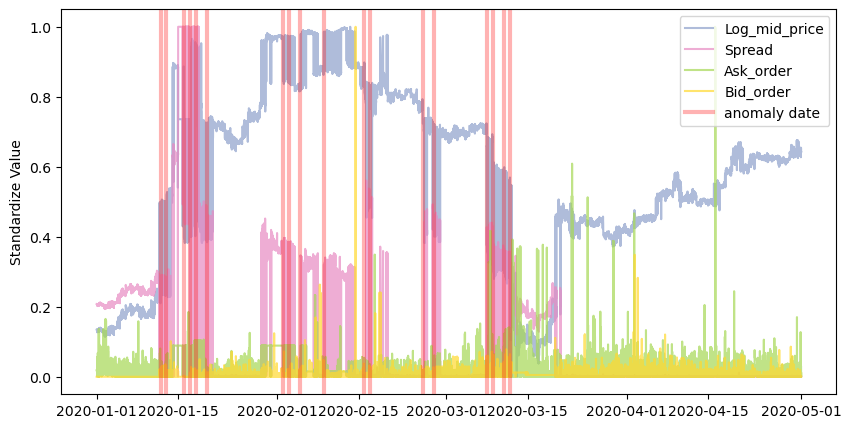

In [149]:
ZEC_trade = read_OB('ZEC',month)
ZEC_anoml_date_train,ZEC_threshold = plot_CADSig_result('ZEC',ZEC_trade,0.85)

In [ ]:
ZEC_threshold

In [ ]:
ZEC_anoml_date_train,ZEC_anoml_date_test = implement_traintest('ZEC',ZEC_OB_train,ZEC_OB_test,0.95)

In [41]:
ZEC_anoml_date_test

[datetime.date(2020, 7, 25)]

#### LTC

C:\Users\Millie\AppData\Local\Temp/ipykernel_28076/1177084670.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ob_total = np.array(ob_total)
C:\Users\Millie\AppData\Local\Temp/ipykernel_28076/3229469503.py:64: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(paths)


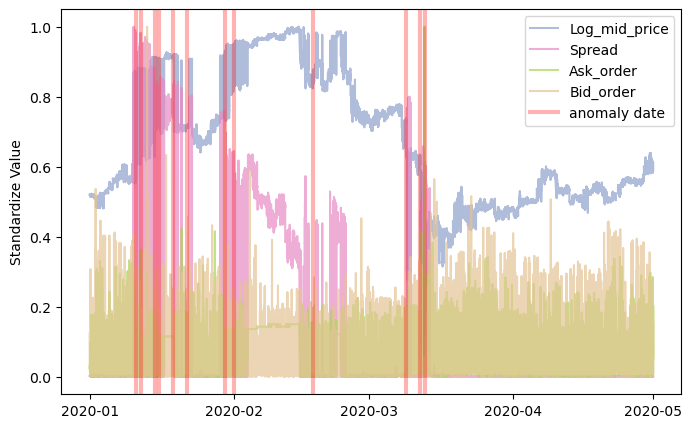

In [20]:
LTC_trade = read_OB('LTC',month)
LTC_anoml_date_train,LTC_threshold = plot_CADSig_result('LTC',LTC_trade,0.9)

In [43]:
LTC_threshold

453896.61941627786

In [34]:
LTC_anoml_date_train

[datetime.date(2020, 3, 12),
 datetime.date(2020, 1, 19),
 datetime.date(2020, 2, 1),
 datetime.date(2020, 1, 16),
 datetime.date(2020, 1, 11),
 datetime.date(2020, 3, 9),
 datetime.date(2020, 3, 13),
 datetime.date(2020, 1, 30)]

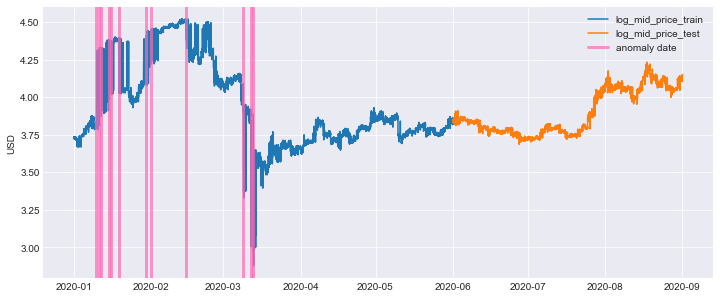

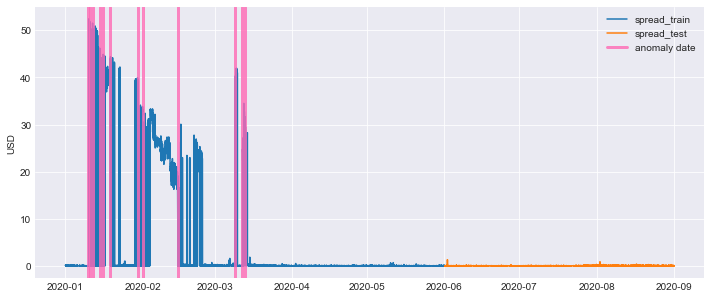

In [44]:
LTC_anoml_date_train,LTC_anoml_date_test = implement_traintest('LTC',LTC_OB_train,LTC_OB_test,0.93)

#### ETH

C:\Users\Millie\AppData\Local\Temp/ipykernel_28076/1177084670.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ob_total = np.array(ob_total)
C:\Users\Millie\AppData\Local\Temp/ipykernel_28076/3229469503.py:64: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(paths)


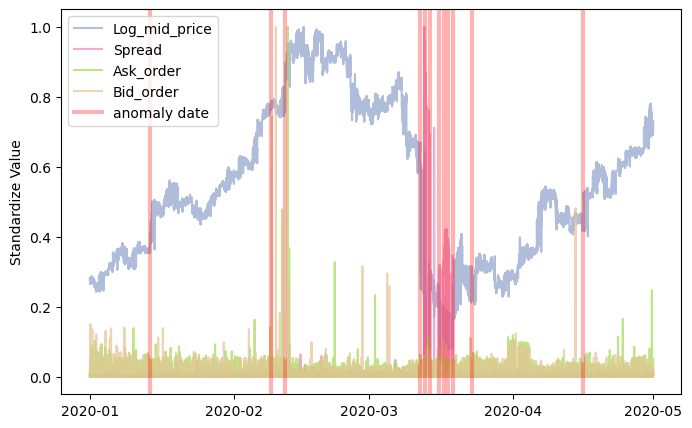

In [21]:
ETH_trade = read_OB('ETH',month)
ETH_anoml_date_train,ETH_threshold = plot_CADSig_result('ETH',ETH_trade,0.9)

In [47]:
ETH_threshold

3563.146171108037

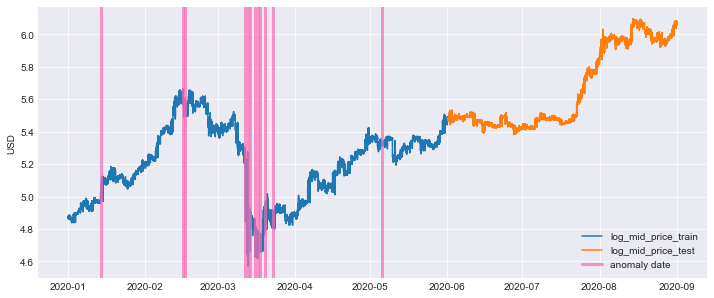

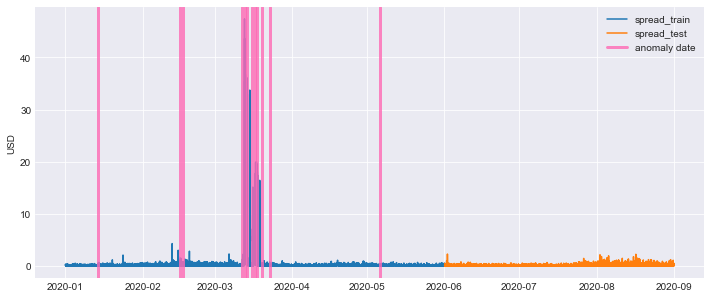

In [46]:
ETH_anoml_date_train,ETH_anoml_date_test = implement_traintest('ETH',ETH_OB_train,ETH_OB_test,0.93)

#### BTC

C:\Users\Millie\AppData\Local\Temp/ipykernel_22972/1177084670.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ob_total = np.array(ob_total)
C:\Users\Millie\AppData\Local\Temp/ipykernel_22972/767709120.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(paths)


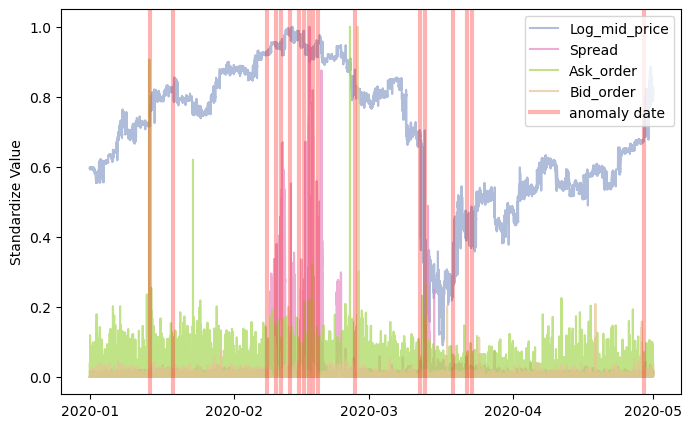

In [200]:
BTC_trade = read_OB('BTC',month)
BTC_anoml_date_train,BTC_threshold = plot_CADSig_result('BTC',BTC_trade,0.85)

In [48]:
BTC_threshold

2740.21355174129

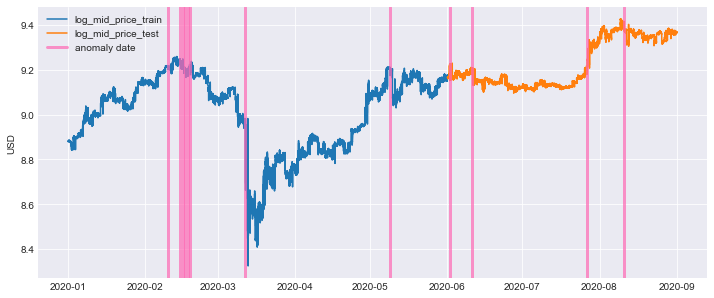

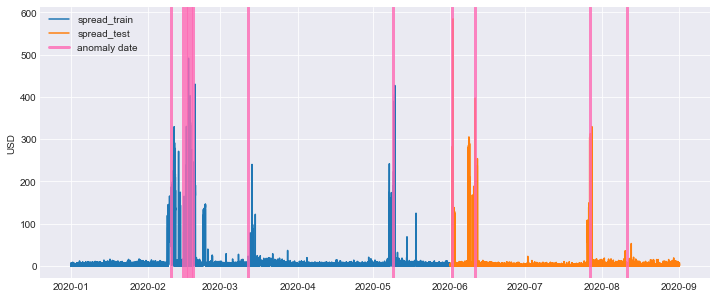

In [48]:
BTC_anoml_date_train,BTC_anoml_date_test = implement_traintest('BTC',BTC_OB_train,BTC_OB_test,0.95)

In [42]:
BTC_anoml_date_test

[datetime.date(2020, 6, 2),
 datetime.date(2020, 6, 11),
 datetime.date(2020, 7, 27),
 datetime.date(2020, 8, 11)]

### Other methods for cryto

In [165]:
# import libraries
# code cite from https://towardsdatascience.com/k-nearest-neighbors-knn-for-anomaly-detection-fdf8ee160d13
from sklearn.neighbors import NearestNeighbors

In [ ]:
from sklearn.preprocessing import StandardScaler
def plot_CADSig_result(OB_name,OB_raw,epsilon):
    OB = creat_ob(OB_raw)

    OB_datetime = OB['datetime']

    OB_trans = create_trans_ob(OB)
    
    min_max_scaler = MinMaxScaler()
    OB_scaled = min_max_scaler.fit_transform(OB_trans[['log_mid_price','spread','ask_order','bid_order']])
    OB_log_mid_price = OB_scaled.T[0]
    OB_spread = OB_scaled.T[1]
    OB_ask_order = OB_scaled.T[2]
    OB_bid_order = OB_scaled.T[3]
    
    OB_trans = OB_trans.drop(columns=['best_ask_price', 'best_bid_price','ask_order','bid_order'])

#     min_max_scaler = MinMaxScaler()
#     OB_scaled = min_max_scaler.fit_transform(OB_trans[['log_mid_price','spread']])
#     OB_log_mid_price = OB_scaled.T[0]
#     OB_spread = OB_scaled.T[1]

    
    anoml_date_train,threshold = OB_conformance_anomaly_detect_trainrepeat(OB_trans,epsilon)
    
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(df['datetime'],df['log_mid_price'],label='log_mid_price',color=sns.color_palette('Set2')[2],alpha =0.7)
    ax.plot(OB_datetime,OB_spread,label='Spread',color=sns.color_palette('Set2')[3],alpha =0.7)
    ax.plot(OB_datetime,OB_ask_order,label='Ask_order',color=sns.color_palette('Set2')[4],alpha =0.7)
    ax.plot(OB_datetime,OB_bid_order,label='Bid_order',color =sns.color_palette('Set2')[6],alpha =0.7)
    
    for i in anoml_date_train:
        ax.axvline(i,color = 'red',label='anomaly date',linewidth = 3,alpha =0.3)
    legend_without_duplicate_labels(ax)
    ax.set_ylabel('Standardize Value')
    fig.savefig('figure/orderbook/market_{}_mid_price_train.png'.format(OB_name), dpi=300)
    
#     fig, ax = plt.subplots(figsize=(12,5))
#     ax.plot(OB_datetime,OB_spread,label='spread_train',color = 'black')
#     for i in anoml_date_train:
#         ax.axvline(i,color = 'red',label='anomaly date',linewidth = 3,alpha =0.7)
#     legend_without_duplicate_labels(ax)
#     ax.set_ylabel('USD')
#     fig.savefig('figure/orderbook/market_{}_spread_train.png'.format(OB_name), dpi=300)
    
    return anoml_date_train,threshold

In [205]:
def plot_knn_result(OB_raw,OB_name):
    OB_trans = create_trans_ob(creat_ob(OB_raw))
    
    min_max_scaler = MinMaxScaler()
    OB_scaled_array = min_max_scaler.fit_transform(OB_trans[['log_mid_price','spread','ask_order','bid_order','imbalance']])
    OB_scaled = pd.DataFrame(OB_scaled_array,columns=['log_mid_price','spread','ask_order','bid_order','imbalance'])
    
    # Create KNN classifier
    nbrs = NearestNeighbors(n_neighbors = 3)
    # Fit the classifier to the data
    X = OB_scaled[['log_mid_price','spread','imbalance']]
    nbrs.fit(X)
    distances_X, indexes_X = nbrs.kneighbors(X)
    thresh = np.quantile(distances_X.mean(axis =1),0.998)
    outlier_index_X = np.where(distances_X.mean(axis = 1) > thresh)
    outlier_values_X = OB_trans.iloc[outlier_index_X]
    
    #plot    
    fig, ax = plt.subplots(figsize=(8,5))
    ax.plot(OB_trans['datetime'],OB_scaled['log_mid_price'],label='Log_mid_price',color=sns.color_palette('Set2')[2],alpha =0.7)
    ax.plot(OB_trans['datetime'],OB_scaled['spread'],label='Spread',color=sns.color_palette('Set2')[3],alpha =0.7)
    ax.plot(OB_trans['datetime'],OB_scaled['ask_order'],label='Ask_order',color=sns.color_palette('Set2')[4],alpha =0.7)
    ax.plot(OB_trans['datetime'],OB_scaled['bid_order'],label='Bid_order',color =sns.color_palette('Set2')[6],alpha =0.7)
    
    for i in outlier_values_X['datetime']:
        ax.axvline(i,color = 'red',label='anomaly date',linewidth = 2,alpha =0.3)
    legend_without_duplicate_labels(ax)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.set_ylabel('Standardize Value')
    fig.savefig('figure/orderbook/market_{}_knn.png'.format(OB_name), dpi=300)
    
    return outlier_values_X

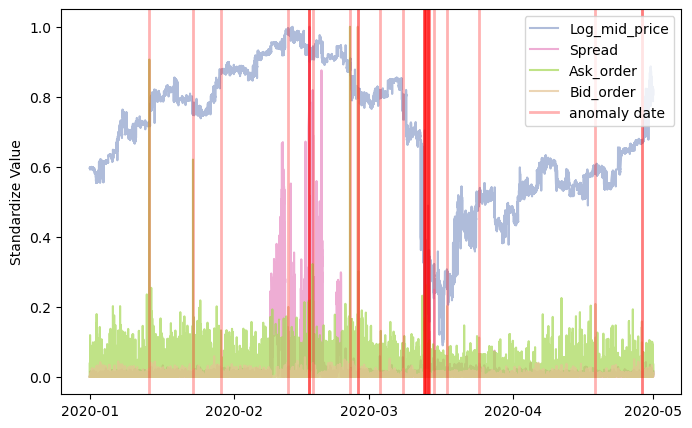

In [206]:
knn_outlier_values_BTC = plot_knn_result(BTC_trade,'BTC')

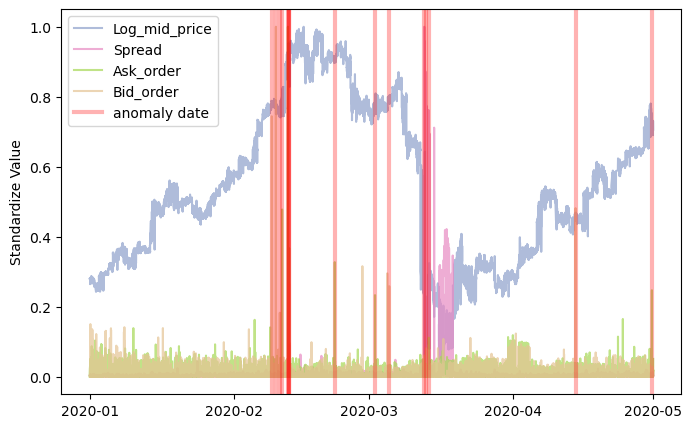

In [190]:
knn_outlier_values_LTC = plot_knn_result(ETH_trade,'ETH')

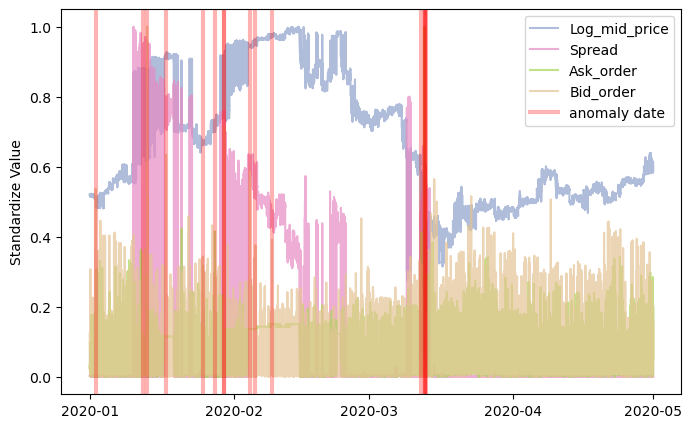

In [185]:
knn_outlier_values_LTC = plot_knn_result(LTC_trade,'LTC')

#### no need for other methods

In [50]:
# Create KNN classifier
nbrs = NearestNeighbors(n_neighbors = 3)
# Fit the classifier to the data
nbrs.fit(X)

NearestNeighbors(n_neighbors=3)

In [51]:
# distances and indexes of k-neaighbors from model outputs
distances_X, indexes_X = nbrs.kneighbors(X)

In [52]:
thresh = np.quantile(distances_X.mean(axis =1),0.999)

In [54]:
outlier_index_X = np.where(distances_X.mean(axis = 1) > thresh)
outlier_index_X

(array([1219, 1223, 1784, 1802, 1969, 2126, 2140, 2144, 3753, 8237, 8282,
        8571, 8577, 8579, 9036, 9038, 9074, 9130, 9155, 9313], dtype=int64),)

In [55]:
outlier_values_X = df.iloc[outlier_index_X]

In [60]:
df_Y = create_trans_ob(creat_ob(LTC_OB_test))
Y = df_Y[['log_mid_price','spread','imbalance']]
nbrs_Y = NearestNeighbors(n_neighbors = 3)
nbrs_Y.fit(Y)
distances_Y, indexes_Y  = nbrs_Y.kneighbors(Y)
outlier_index_Y = np.where(distances_Y.mean(axis = 1) > thresh)
outlier_index_Y

(array([ 142, 7992], dtype=int64),)

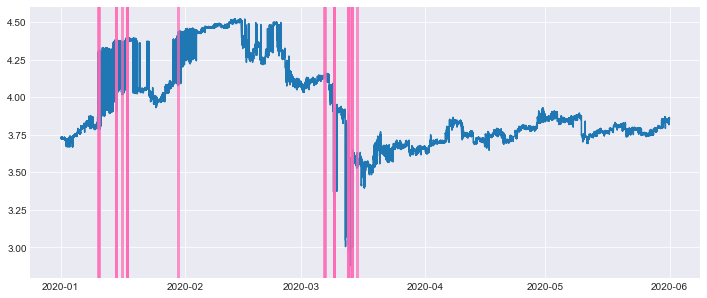

In [103]:
fig, ax = plt.subplots(figsize=(12,5))
    
ax.plot(df['datetime'],df['log_mid_price'],label='log_mid_price_train')
for i in outlier_values['datetime']:
    ax.axvline(i,color = 'hotpink',label='anomaly date',linewidth = 3,alpha =0.7)

### S&P 1000

In [49]:
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
second_table = payload[1]

df = first_table

In [50]:
symbols = df['Symbol'].values.tolist()
len(symbols)

505

In [51]:
from pandas_datareader import data
#tickers = ['AAPL', 'MSFT', '^GSPC']
start_date = "2018-01-04"
end_date =  "2021-08-01"
AAPL = data.DataReader('AES', 'yahoo', start_date, end_date)

In [77]:
time_date = AAPL.index[1:]

In [54]:
sp_500_list = []
sp_500_ticker_list = []
for ticker in symbols[:200]:
    
    try:
        close = data.DataReader("{}".format(ticker), 'yahoo',"2018-01-04", "2021-08-01")['Close']
    except KeyError:
        print('skip')
    close = close.fillna(method='ffill')
    sp_500_list.append(close.to_numpy())
    sp_500_ticker_list.append(ticker)

skip
skip


In [ ]:
for ticker in symbols[200:]:
    
    try:
        close = data.DataReader("{}".format(ticker), 'yahoo',"2018-01-04", "2021-08-01")['Close']
    except KeyError:
        print('skip')
    close = close.fillna(method='ffill')
    sp_500_list.append(close.to_numpy())
    sp_500_ticker_list.append(ticker)

In [55]:
sp500_data = pd.DataFrame(sp_500_list) #Each list would be added as a row
sp500_data = sp500_data.transpose() #To Transpose and make each rows as columns
sp500_data.columns=sp_500_ticker_list#Rename the columns
sp500_data = sp500_data.fillna(method='ffill')
sp500_data.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,FIS,FITB,FE,FRC,FISV,FLT,FMC,F,FTNT,FTV
0,238.710007,58.820000,99.379997,199.250000,156.380005,64.660004,183.220001,12.12,111.000000,10.83,...,94.949997,30.629999,30.320000,88.470001,66.629997,195.460007,84.518646,12.98,44.000000,62.133892
1,240.570007,58.990002,101.110001,202.320007,157.669998,66.370003,185.339996,11.88,112.180000,10.87,...,95.489998,30.709999,30.110001,88.139999,67.290001,197.000000,85.065048,13.20,44.099998,61.422596
2,239.789993,58.820000,99.489998,207.800003,158.929993,66.629997,185.039993,12.28,111.389999,10.87,...,95.730003,30.700001,30.389999,88.330002,67.425003,197.160004,85.143105,13.15,45.000000,61.297070
3,241.279999,58.919998,100.239998,209.759995,159.460007,66.190002,186.699997,11.82,110.489998,10.76,...,96.040001,31.250000,30.059999,88.199997,68.144997,196.910004,85.108414,13.08,44.320000,61.740585
4,241.139999,58.830002,99.690002,208.139999,158.899994,66.830002,187.110001,11.96,110.589996,10.78,...,97.279999,31.580000,29.820000,89.989998,68.504997,200.910004,84.579361,13.03,44.099998,61.104603


In [56]:
sp500_return = sp500_data.diff()

In [62]:
sp500_return = sp500_return.dropna()

#### One stock analysis

In [63]:
MMM = sp500_return.MMM.to_numpy()
MMM_norm = MMM / np.linalg.norm(MMM)

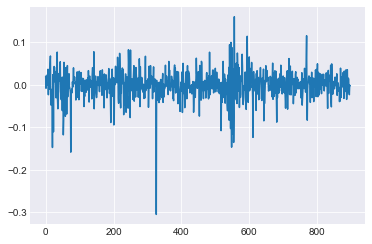

In [65]:
plt.plot(MMM_norm)

In [79]:
def stock_anomaly_detect_withouttest(price,date,epsilon):

    stock_addtime = np.array([np.linspace(0,1,len(price)),price])
    stock_addtime_T = stock_addtime.T
    stock_addtime_ll = transform(stock_addtime_T,False,True)
    anoml_train_date = []
    
    X1,X2,X1_date,X2_date= sign_splitdata_train(stock_addtime_ll,date,5)
    conf_threshold,X1_predlabel,X2_predlabel = thershold_all(X1,X2,epsilon)
    
    for i in range(len(X1_predlabel)):
        if X1_predlabel[i] == 1:
            anoml_train_date.append(X1_date[i])
    for i in range(len(X2_predlabel)):
        if X2_predlabel[i] == 1:
            anoml_train_date.append(X2_date[i])
            
    return anoml_train_date

In [ ]:
def stock_anomaly_detect(price,date,epsilon):

    stock_addtime = np.array([np.linspace(0,1,len(price)),price])
    stock_addtime_T = stock_addtime.T
    stock_addtime_ll = transform(stock_addtime_T,False,True)
    
    X1,X2,X1_date,X_test= sign_splitdata(stock_addtime_ll[:500],date[:500],stock_addtime_ll[:500],5)

    conf_threshold,X1_predlabel = thershold(X1,X2,epsilon)
    test_conf,X_test_predlabel = pred_anomaly(X_test,X2,conf_threshold)
    
    anoml_train_date = []
    for i in range(len(X1_predlabel)):
        if X1_predlabel[i] == 1:
            anoml_train_date.append(X1_date[i])
            
    anoml_test_date = []
    for i in range(len(X_test_predlabel)):
        if X_test_predlabel[i] == 1:
            anoml_test_date.append(date[i])     
    return anoml_train_date,X_test_predlabel

In [83]:
MMM_anoml_date_list = stock_anomaly_detect_withouttest(MMM_norm,time_date,0.95)

In [85]:
MMM_anoml_date_list.sort()

In [86]:
MMM_anoml_date_list

[Timestamp('2018-01-05 00:00:00'),
 Timestamp('2018-01-08 00:00:00'),
 Timestamp('2018-01-10 00:00:00'),
 Timestamp('2018-01-11 00:00:00'),
 Timestamp('2018-01-12 00:00:00'),
 Timestamp('2018-01-16 00:00:00'),
 Timestamp('2018-01-17 00:00:00'),
 Timestamp('2018-01-22 00:00:00'),
 Timestamp('2018-01-24 00:00:00'),
 Timestamp('2018-01-25 00:00:00'),
 Timestamp('2018-01-26 00:00:00'),
 Timestamp('2018-01-29 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-02-01 00:00:00'),
 Timestamp('2018-02-06 00:00:00'),
 Timestamp('2018-02-07 00:00:00'),
 Timestamp('2018-02-09 00:00:00'),
 Timestamp('2018-02-12 00:00:00'),
 Timestamp('2018-02-13 00:00:00'),
 Timestamp('2018-02-15 00:00:00'),
 Timestamp('2018-02-16 00:00:00'),
 Timestamp('2018-02-26 00:00:00'),
 Timestamp('2018-03-05 00:00:00'),
 Timestamp('2018-03-06 00:00:00'),
 Timestamp('2018-03-15 00:00:00'),
 Timestamp('2018-03-20 00:00:00'),
 Timestamp('2018-03-26 00:00:00'),
 Timestamp('2018-03-29 00:00:00'),
 Timestamp('2018-12-

In [469]:
MMM_anoml_train_date,MMM_X_test_predlabel = stock_anomaly_detect(MMM_norm,time_date,0.9)

In [81]:
# anomaly scatter points
time_date_list = time_date.to_list()
MM_anomaly_date_value = []
for i in range(len(MMM_anoml_date_list)):
    MM_anomaly_date_value.append(MMM[time_date_list.index(MMM_anoml_date_list[i])])

Text(0, 0.5, 'USD')

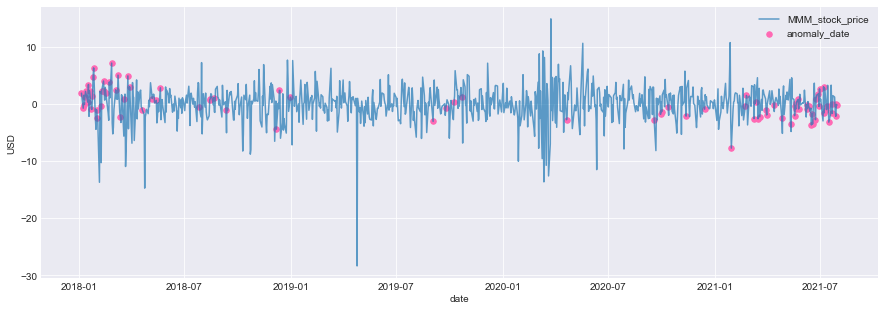

In [82]:
plt.figure(figsize = (15,5))
plt.plot(time_date,MMM,label='MMM_stock_price',alpha =0.7)
plt.scatter(MMM_anoml_date_list,MM_anomaly_date_value,label = 'anomaly_date',color='hotpink',s=30)
plt.legend(loc= 'best')
plt.xlabel("date")
plt.ylabel("USD")

In [453]:
MMM_addtime = np.array([np.linspace(0,1,len(MMM_norm)),MMM_norm])

In [454]:
MMM_addtime_T = MMM_addtime.T

In [455]:
MMM_addtime_ll = transform(MMM_addtime_T,False,True)

In [458]:
MM1,MM2,MMM_date,MM_test= sign_splitdata(MMM_addtime_ll[:500],time_date[:500],MMM_addtime_ll[500:],5)
MM_threshold,MM1_predlabel = thershold(MM1,MM2,0.90)
MM_test_conf,MM_test_predlabel = pred_anomaly(MM_test,MM2,MM_threshold)

(array([  0.,   0.,   0.,   0.,   0., 399.,   0.,   0.,   0.,   0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <a list of 10 Patch objects>)

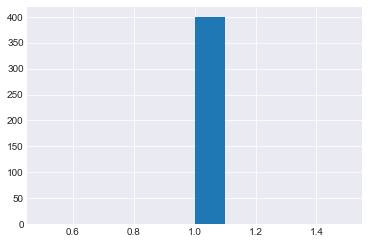

In [459]:
plt.hist(MM_test_predlabel)

In [447]:
MMM_test_anoml = []
for i in range(len(MM_test_predlabel)):
        if MM_test_predlabel[i] == 1:
            MMM_test_anoml.append(time_date[500+i])
MMM_test_anoml

#### Multi-stock analysis

In [375]:
normalized_sp500_data=(sp500_data-sp500_data.min())/(sp500_data.max()-sp500_data.min())

In [370]:
normalized_sp500_data = normalized_sp500_data.T

In [376]:
normalized_sp500_data.dropna(inplace=True)

In [377]:
normalized_sp500_data.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS


In [366]:
normalized_sp500_data.T.dropna(inplace=True)

In [367]:
normalized_sp500_data.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
0,0.858483,0.035436,0.604350,0.215324,0.121953,0.385400,0.000000,0.026795,0.256306,0.065633,...,0.121423,0.759543,0.153161,0.085900,0.183788,0.345132,0.000000,0.450194,0.739707,0.007692
1,0.871697,0.037799,0.633073,0.224941,0.128880,0.412245,0.004789,0.024312,0.264714,0.067700,...,0.128596,0.766421,0.143033,0.126890,0.181910,0.351543,0.003779,0.462850,0.740260,0.013951
2,0.866155,0.035436,0.606176,0.242106,0.135646,0.416326,0.004112,0.028450,0.259085,0.067700,...,0.122532,0.752603,0.153775,0.132378,0.185522,0.353413,0.006230,0.465299,0.733352,0.020587
3,0.876741,0.036826,0.618629,0.248246,0.138492,0.409419,0.007862,0.023691,0.252672,0.062015,...,0.125638,0.759543,0.136894,0.134617,0.185811,0.350474,0.013855,0.444581,0.766234,0.027147
4,0.875746,0.035575,0.609497,0.243171,0.135485,0.419466,0.008788,0.025140,0.253385,0.063049,...,0.138801,0.750710,0.122775,0.126330,0.178587,0.347669,0.015564,0.427638,0.781155,0.018098


In [345]:
normalized_sp500_data.T.values

array([[0.85848254, 0.87169652, 0.86615508, ..., 0.571256  , 0.57047453,
        0.56884057],
       [0.03543635, 0.0377988 , 0.03543635, ..., 0.89285715, 0.90077821,
        0.89924968],
       [0.60434996, 0.63307324, 0.6061763 , ..., 0.92262998, 0.92794295,
        0.88527318],
       ...,
       [0.45019391, 0.46284961, 0.46529907, ..., 0.83619103, 0.83802822,
        0.84496834],
       [0.73970705, 0.7402597 , 0.73335172, ..., 0.78143134, 0.79469466,
        0.77562866],
       [0.0076917 , 0.01395067, 0.02058665, ..., 0.9935903 , 1.        ,
        0.98929192]])

In [353]:
sp_500_ll = transform(sp_500_list,False,True)

In [354]:
sp_500_1,sp_500_2,sp_500_1_label,= sign_splitdata(sp_500_ll[:500],sp_500_ticker_list[:500],sp_500_ll[500:],5)

sp_500_threshold,sp_500_1_predlabel = thershold(sp_500_1,sp_500_2,0.90)
pred_anomaly(sp_500_ll[500:],sp_500_2,cov_X2,thresh)

In [355]:
sp500_anoml_date_list = []
for i in range(len(sp_500_1_predlabel)):
        if sp_500_1_predlabel[i] == 1:
            sp500_anoml_date_list.append(sp_500_1_label[i])
sp500_anoml_date_list.sort()

In [356]:
sp500_anoml_date_list

['ABMD',
 'ANET',
 'ANSS',
 'ANTM',
 'AZO',
 'BIIB',
 'BKNG',
 'CMG',
 'CRM',
 'FDX',
 'GOOG',
 'GOOGL',
 'HUM',
 'ILMN',
 'IPGP',
 'ISRG',
 'LMT',
 'MKTX',
 'NVR',
 'POOL',
 'REGN',
 'TDY',
 'TYL',
 'ULTA',
 'VRTX',
 'ZBRA']

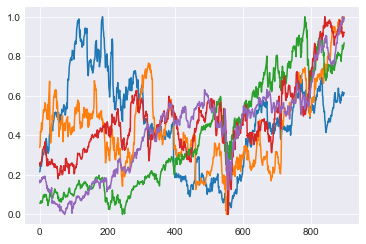

In [369]:
for i in sp500_anoml_date_list[:5]:
    plt.plot(normalized_sp500_data[i])

In [ ]:
for i in sp500_anoml_date_list[:5]:
    plt.plot(normalized_sp500_data[i])

In [292]:
# for ticker in symbols[:]:
    
#     try:
#         close = data.DataReader("{}".format(ticker), 'yahoo',"2018-01-04", "2021-08-01")['Close']
#     except KeyError:
#         print('skip')
#     close = close.fillna(method='ffill')
#     sp_500_list.append(close.to_numpy())
#     sp_500_ticker_list.append(ticker)

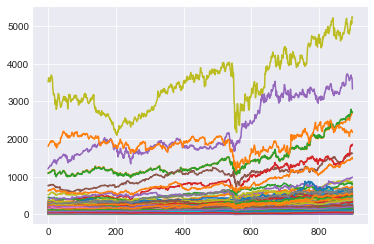

In [306]:
for i in sp_500_list:
    plt.plot(i)

### The conformance model

In [81]:
def sign_splitdata(x,y,x_test,order):
    signa = [list(sig(stream, order)) for stream in x]
    signa_test = [list(sig(stream, order)) for stream in x_test]
    
    scaler = MinMaxScaler()
    X_center = np.array(scaler.fit_transform(signa))
    X_testcenter = np.array(scaler.transform(signa_test))

    X1,X2,y1,y2 = train_test_split(X_center,y,test_size=0.5,random_state=10)
    
    return X1,X2,y1,y2,X_testcenter

In [82]:
def sign_splitdata_train(x,y,order):
    signa = [list(sig(stream, order)) for stream in x]
    
    scaler = MinMaxScaler()
    X_center = np.array(scaler.fit_transform(signa))
    X1,X2,y1,y2 = train_test_split(X_center,y,test_size=0.5,random_state=10)
    
    return X1,X2,y1,y2

In [83]:
def sign_splitdata_all(x,y,x_test,order):
    signa = [list(sig(stream, order)) for stream in x]
    signa_test = [list(sig(stream, order)) for stream in x_test]
    
    scaler = MinMaxScaler()
    X_center = np.array(scaler.fit_transform(signa))
    X_testcenter = np.array(scaler.transform(signa_test))

    X1,X2,y1,y2 = train_test_split(X_center,y,test_size=0.5,random_state=10)
    
    return X1,X2,y1,y2,X_testcenter,X_center

In [84]:
def conformance(x, X2):
    cov_X2 = np.linalg.pinv(np.cov((x-X2).T))
    inf = distance.mahalanobis(x, X2[0], cov_X2)
    for i in range(len(X2)):
        mal = distance.mahalanobis(x, X2[i], cov_X2)
        if inf > mal:
            inf = mal
    return inf

In [85]:
def thershold_all(X1,X2,epsilon):
    threshold_1,pred_label_1 = thershold(X1,X2,epsilon)
    threshold_2,pred_label_2 = thershold(X2,X1,epsilon)
    return (threshold_1+threshold_2)/2,pred_label_1,pred_label_2

In [86]:
def thershold(X1,X2,epsilon):
    dist = []
    pred_label = []
    for i in range(len(X1)):
        dist.append(conformance(X1[i],X2))
    dist = np.array(dist)
    threshold = np.quantile(dist,epsilon)
    
    for i in range(len(X1)):
        if dist[i] > threshold:
            dist = np.array(dist)
            pred_label.append(1)
        else:
            pred_label.append(0)
    return threshold,pred_label

In [87]:
def pred_anomaly(X_test,X2,thresh):
    predlabel = []
    conf = []
    for i in range(len(X_test)):
        conf.append(conformance(X_test[i],X2))
        if conf[i] > thresh:
            predlabel.append(1)
        else:
            predlabel.append(0)
    return conf,predlabel

In [88]:
# cited from https://github.com/crispitagorico/sigkernel/blob/master/sigkernel/transformers.py
import copy
import math
from scipy.ndimage import shift
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import as_float_array
def transform(paths, at=False, ll=False, scale=1.):
    #paths = scale*paths
    if ll:
        paths = LeadLag().fit_transform(paths)
    if at:
        paths = AddTime().fit_transform(paths)
    return np.array(paths)

def normalize(sigs, width, depth):
    new_sigs = []
    for sig in sigs:
        new_sig = np.zeros_like(sig)
        for k in range(depth):
            dim = width*(width**(k)-1)
            new_sig[dim:dim + width**(k+1)] = math.factorial(k+1)*sig[dim:dim + width**(k+1)]
        new_sigs.append(new_sig)
    return np.array(new_sigs)

class AddTime(BaseEstimator, TransformerMixin):
    def __init__(self, init_time=0., total_time=1.):
        self.init_time = init_time
        self.total_time = total_time

    def fit(self, X, y=None):
        return self

    def transform_instance(self, X):
        t = np.linspace(self.init_time, self.init_time + 1, len(X))
        return np.c_[t, X]

    def transform(self, X, y=None):
        return [self.transform_instance(x) for x in X]

class Reversion(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return [as_float_array(x[::-1]) for x in X]


class LeadLag(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform_instance(self, X):
        lag = []
        lead = []

        for val_lag, val_lead in zip(X[:-1], X[1:]):
            lag.append(val_lag)
            lead.append(val_lag)

            lag.append(val_lag)
            lead.append(val_lead)

        lag.append(X[-1])
        lead.append(X[-1])

        return np.c_[lag, lead]

    def transform(self, X, y=None):
        return [self.transform_instance(x) for x in X]

In [34]:
# #Code cited from https://towardsdatascience.com/unsupervised-learning-for-anomaly-detection-44c55a96b8c1
# classes = np.array(['0','1'])
# def plot_confusion_matrix(cm, classes,title='Confusion matrix', cmap=plt.cm.Blues):
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)
#     fmt = 'd'
#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')